In [51]:
import os
from operator import itemgetter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

import tensorflow as tf

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Both positive and negative sentiment are assigned to movie reviews in the IMDB dataset.

As part of the preprocessing of the dataset, each review is transformed into a set of word embeddings, where each word is represented by a fixed-size vector.

In [52]:
from keras.layers import Embedding

# The Embedding layer requires a minimum of two inputs:
# The maximum word index plus one, or 1000, is the number of potential tokens.
# and the embeddings' dimensions, in this case 64.
layEmbd = Embedding(1000, 64)

from keras.datasets import imdb
from keras import preprocessing
from keras.utils import pad_sequences


custom-trained embedding layer with training sample size = 100

In [53]:
# The number of words that should be considered as features
Fe_ature = 10000
# Remove the text after this number of words (from the top Fe_ature most common words)
_leng = 150


(TrainingX, TrainingY), (XTesting, YTesting) = imdb.load_data(num_words=Fe_ature)

TrainingX = TrainingX[:100]
TrainingY = TrainingY[:100]


TrainingX = pad_sequences(TrainingX, maxlen=_leng)
XTesting = pad_sequences(XTesting, maxlen=_leng)

from keras.models import Sequential
from keras.layers import Flatten, Dense

mdl = Sequential()

mdl.add(Embedding(10000, 8, input_length=_leng))

mdl.add(Flatten())

# We add the classifier on top
mdl.add(Dense(1, activation='sigmoid'))
mdl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
mdl.summary()

hist_1 = mdl.fit(TrainingX, TrainingY,
                   epochs=10,
                   batch_size=32,
                   validation_split=0.2)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 212ms/step - acc: 0.4383 - loss: 0.6967 - val_acc: 0.5000 - val_loss: 0.6946
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.8961 - loss: 0.6681 - val_acc: 0.5500 - val_loss: 0.6953
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - acc: 0.9719 - loss: 0.6507 - val_acc: 0.5500 - val_loss: 0.6962
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - acc: 1.0000 - loss: 0.6324 - val_acc: 0.5500 - val_loss: 0.6971
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - acc: 1.0000 - loss: 0.6176 - val_acc: 0.5000 - val_loss: 0.6982
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - acc: 1.0000 - loss: 0.6000 - val_acc: 0.5000 - val_loss: 0.6994
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - acc: 1.0000 - loss: 0.5846 - val_acc: 0.5500 - val_loss: 0.7012
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - acc: 0.9898 - loss: 0.5680 - val_acc: 0.5500 - val_loss: 0.7033
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - acc: 0.9719 - loss: 0.5460 -

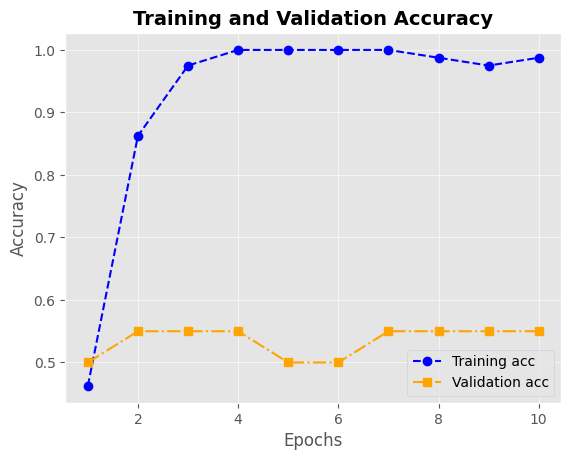

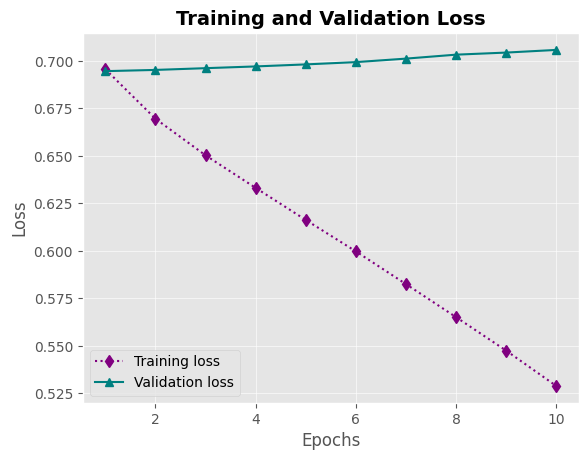

In [54]:
import matplotlib.pyplot as pl

# Train accuracy
a_c_c = hist_1.history["acc"]
# Validation accuracy
val_a_c_c = hist_1.history["val_acc"]
# Train loss
lssTr_ain = hist_1.history["loss"]
# Validation loss
lssVal = hist_1.history["val_loss"]

_epochs = range(1, len(a_c_c) + 1)

pl.plot(_epochs, a_c_c, color="blue", linestyle="--", marker="o", label="Training acc")
pl.plot(_epochs, val_a_c_c, color="orange", linestyle="-.", marker="s", label="Validation acc")
pl.title("Training and Validation Accuracy", fontsize=14, fontweight='bold')
pl.xlabel("Epochs")
pl.ylabel("Accuracy")
pl.legend()
pl.grid(alpha=0.6)
pl.figure()


pl.plot(_epochs, lssTr_ain, color="purple", linestyle=":", marker="d", label="Training loss")
pl.plot(_epochs, lssVal, color="teal", linestyle="-", marker="^", label="Validation loss")
pl.title("Training and Validation Loss", fontsize=14, fontweight='bold')
pl.xlabel("Epochs")
pl.ylabel("Loss")
pl.legend()
pl.grid(alpha=0.6)

pl.show()


In [56]:
tst_lss, tst_a_c_c = mdl.evaluate(XTesting, YTesting)
print('Test loss:', tst_lss)
print('Test accuracy:', tst_a_c_c)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.4938 - loss: 0.6947
Test loss: 0.6948661804199219
Test accuracy: 0.4943599998950958


In [55]:
Fe_ature = 10000
_leng = 150

(TrainingX, TrainingY), (XTesting, YTesting) = imdb.load_data(num_words=Fe_ature)

TrainingX = pad_sequences(TrainingX, maxlen=_leng)
XTesting = pad_sequences(XTesting, maxlen=_leng)

comb_texts = np.concatenate((TrainingX, XTesting), axis=0)
comb_labels = np.concatenate((TrainingY, YTesting), axis=0)

TrainingX = TrainingX[:5000]
TrainingY = TrainingY[:5000]


In [57]:
mdl2 = Sequential()
mdl2.add(Embedding(10000, 8, input_length=_leng))
mdl2.add(Flatten())
mdl2.add(Dense(1, activation='sigmoid'))
mdl2.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
mdl2.summary()

hist_2 = mdl2.fit(TrainingX, TrainingY,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - acc: 0.5095 - loss: 0.6928 - val_acc: 0.5770 - val_loss: 0.6878
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.7611 - loss: 0.6684 - val_acc: 0.6680 - val_loss: 0.6580
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.8122 - loss: 0.5979 - val_acc: 0.7440 - val_loss: 0.5882
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8708 - loss: 0.4803 - val_acc: 0.7680 - val_loss: 0.5171
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.8984 - loss: 0.3720 - val_acc: 0.7710 - val_loss: 0.4869
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9192 - loss: 0.2925 - val_acc: 0.8000 - val_loss: 0.4365
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.9413 - loss: 0.2323 - val_acc: 0.8180 - val_loss: 0.4193
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - acc: 0.9561 - loss: 0.1868 - val_acc: 0.8150 - val_loss: 0.4088
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - ac

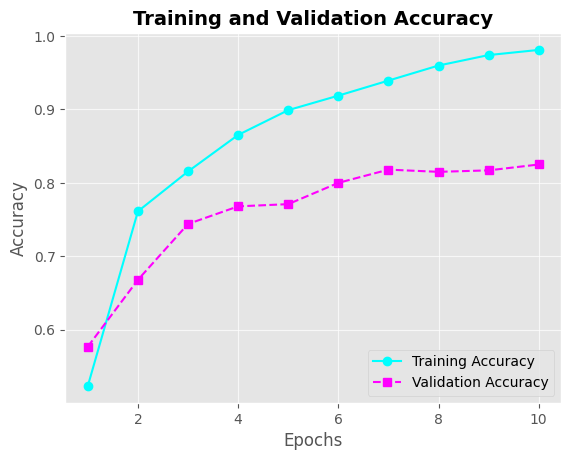

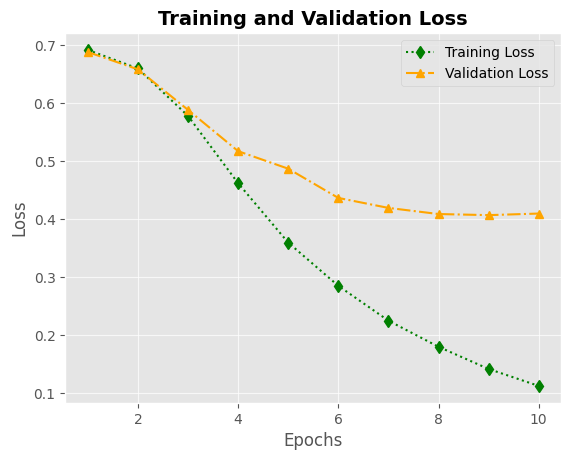

In [58]:
a_c_c2 = hist_2.history['acc']
val_a_c_c2 = hist_2.history['val_acc']
lssTr_ain2 = hist_2.history['loss']
lssVal2 = hist_2.history['val_loss']

_epochs = range(1, len(a_c_c2) + 1)

pl.plot(_epochs, a_c_c2, color="cyan", linestyle="-", marker="o", label="Training Accuracy")
pl.plot(_epochs, val_a_c_c2, color="magenta", linestyle="--", marker="s", label="Validation Accuracy")
pl.title("Training and Validation Accuracy", fontsize=14, fontweight='bold')
pl.xlabel("Epochs")
pl.ylabel("Accuracy")
pl.legend(loc="lower right")
pl.grid(alpha=0.7)

pl.figure()


pl.plot(_epochs, lssTr_ain2, color="green", linestyle=":", marker="d", label="Training Loss")
pl.plot(_epochs, lssVal2, color="orange", linestyle="-.", marker="^", label="Validation Loss")
pl.title("Training and Validation Loss", fontsize=14, fontweight='bold')
pl.xlabel("Epochs")
pl.ylabel("Loss")
pl.legend(loc="upper right")
pl.grid(alpha=0.7)

pl.show()


In [59]:
tst_lss2, test_a_c_c2 = mdl2.evaluate(XTesting, YTesting)
print('Test loss:', tst_lss2)
print('Test accuracy:', test_a_c_c2)


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - acc: 0.8335 - loss: 0.3740
Test loss: 0.37439119815826416
Test accuracy: 0.8318399786949158


custom-trained embedding layer with training sample size = 1000

In [60]:
Fe_ature = 10000
_leng = 150

(TrainingX, TrainingY), (XTesting, YTesting) = imdb.load_data(num_words=Fe_ature)

TrainingX = pad_sequences(TrainingX, maxlen=_leng)
XTesting = pad_sequences(XTesting, maxlen=_leng)

t_ext_ = np.concatenate((TrainingX, XTesting), axis=0)
lbl_s = np.concatenate((TrainingY, YTesting), axis=0)

TrainingX = TrainingX[:1000]
TrainingY = TrainingY[:1000]


In [61]:
model3 = Sequential()
model3.add(Embedding(10000, 8, input_length=_leng))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model3.summary()
history3 = model3.fit(TrainingX, TrainingY,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.4659 - loss: 0.6940 - val_acc: 0.4950 - val_loss: 0.6925
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.7720 - loss: 0.6771 - val_acc: 0.5150 - val_loss: 0.6917
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.8554 - loss: 0.6625 - val_acc: 0.5300 - val_loss: 0.6907
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9020 - loss: 0.6385 - val_acc: 0.5350 - val_loss: 0.6893
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9378 - loss: 0.6124 - val_acc: 0.5350 - val_loss: 0.6875
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9553 - loss: 0.5793 - val_acc: 0.5450 - val_loss: 0.6852
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9606 - loss: 0.5437 - val_acc: 0.5650 - val_loss: 0.6824
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - acc: 0.9615 - loss: 0.5002 - val_acc: 0.5800 - val_loss: 0.6793
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9806 - loss:

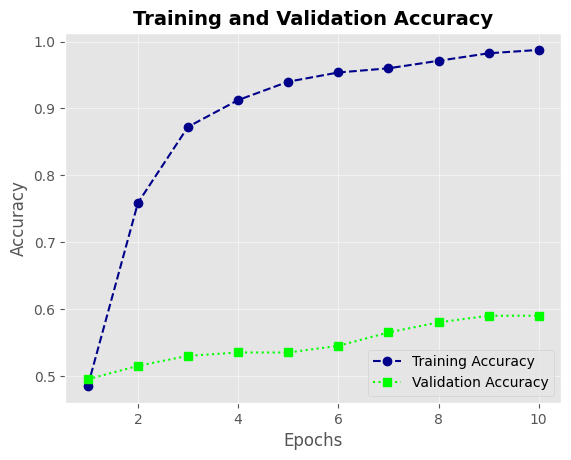

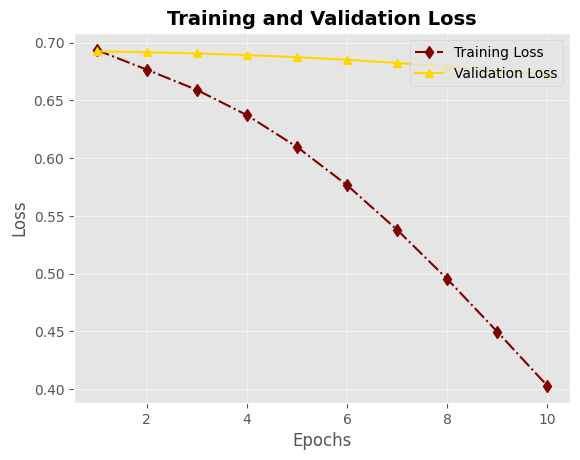

In [62]:
a_c_c3 = history3.history["acc"]
val_a_c_c3 = history3.history["val_acc"]
lssTr_ain3 = history3.history["loss"]
lssVal3 = history3.history["val_loss"]

_epochs = range(1, len(a_c_c3) + 1)

pl.plot(_epochs, a_c_c3, color="darkblue", linestyle="--", marker="o", label="Training Accuracy")
pl.plot(_epochs, val_a_c_c3, color="lime", linestyle=":", marker="s", label="Validation Accuracy")
pl.title("Training and Validation Accuracy", fontsize=14, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Accuracy")
pl.legend(loc="lower right")
pl.grid(alpha=0.5)

pl.figure()


pl.plot(_epochs, lssTr_ain3, color="maroon", linestyle="-.", marker="d", label="Training Loss")
pl.plot(_epochs, lssVal3, color="gold", linestyle="-", marker="^", label="Validation Loss")
pl.title("Training and Validation Loss", fontsize=14, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Loss")
pl.legend(loc="upper right")
pl.grid(alpha=0.5)

pl.show()


In [63]:
tst_lss3, tst_acc3 = model3.evaluate(XTesting, YTesting)
print('Test loss:', tst_lss3)
print('Test accuracy:', tst_acc3)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5724 - loss: 0.6780
Test loss: 0.6785645484924316
Test accuracy: 0.5690799951553345


custom-trained embedding layer with training sample size = 10000

In [64]:
Fe_ature = 10000
_leng = 150

(TrainingX, TrainingY), (XTesting, YTesting) = imdb.load_data(num_words=Fe_ature)

TrainingX = pad_sequences(TrainingX, maxlen=_leng)
XTesting = pad_sequences(XTesting, maxlen=_leng)

t_ext_ = np.concatenate((TrainingX, XTesting), axis=0)
lbl_s = np.concatenate((TrainingY, YTesting), axis=0)

TrainingX = TrainingX[:10000]
TrainingY = TrainingY[:10000]


In [65]:
mdl4 = Sequential()
mdl4.add(Embedding(10000, 8, input_length=_leng))
mdl4.add(Flatten())
mdl4.add(Dense(1, activation='sigmoid'))
mdl4.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
mdl4.summary()
hist_4 = mdl4.fit(TrainingX, TrainingY,
                  epochs=10,
                  batch_size=32,
                  validation_split=0.2)



Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_21 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - acc: 0.5243 - loss: 0.6914 - val_acc: 0.6710 - val_loss: 0.6661
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.7696 - loss: 0.6121 - val_acc: 0.8075 - val_loss: 0.4936
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8485 - loss: 0.4249 - val_acc: 0.8465 - val_loss: 0.3821
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.8808 - loss: 0.3174 - val_acc: 0.8475 - val_loss: 0.3453
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9140 - loss: 0.2486 - val_acc: 0.8540 - val_loss: 0.3289
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9322 - loss: 0.2029 - val_acc: 0.8615 - val_loss: 0.3186
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9475 - loss: 0.1649 - val_acc: 0.8575 - val_loss: 0.3187
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - acc: 0.9622 - loss: 0.1356 - val_acc: 0.8590 - val_loss: 0.3214
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - ac

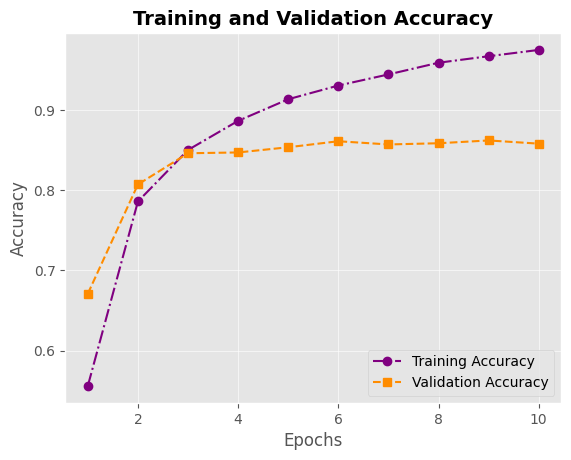

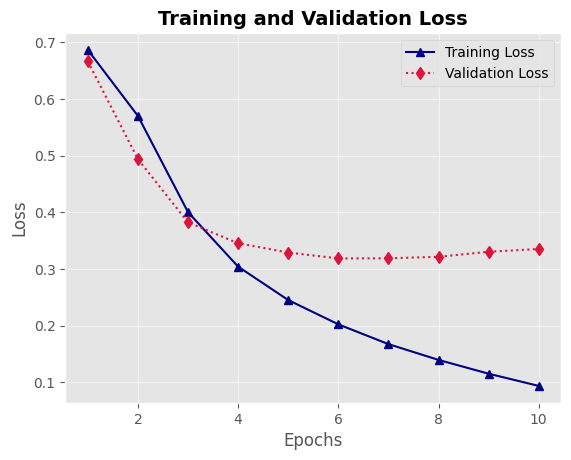

In [66]:
a_c_c4 = hist_4.history["acc"]
val_a_c_c4 = hist_4.history["val_acc"]
lssTr_ain4 = hist_4.history["loss"]
lssVal4 = hist_4.history["val_loss"]

_epochs = range(1, len(a_c_c4) + 1)

pl.plot(_epochs, a_c_c4, color="purple", linestyle="-.", marker="o", label="Training Accuracy")
pl.plot(_epochs, val_a_c_c4, color="darkorange", linestyle="--", marker="s", label="Validation Accuracy")
pl.title("Training and Validation Accuracy", fontsize=14, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Accuracy")
pl.legend(loc="lower right")
pl.grid(alpha=0.6)

pl.figure()


pl.plot(_epochs, lssTr_ain4, color="navy", linestyle="-", marker="^", label="Training Loss")
pl.plot(_epochs, lssVal4, color="crimson", linestyle=":", marker="d", label="Validation Loss")
pl.title("Training and Validation Loss", fontsize=14, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Loss")
pl.legend(loc="upper right")
pl.grid(alpha=0.6)

pl.show()

In [67]:
tst_lss4, tst_a_c_c4 = mdl4.evaluate(XTesting, YTesting)
print('Test loss:', tst_lss4)
print('Test accuracy:', tst_a_c_c4)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.8493 - loss: 0.3503
Test loss: 0.34741348028182983
Test accuracy: 0.8511199951171875


In [68]:
!curl -O https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar -xf aclImdb_v1.tar.gz
!rm -r aclImdb/train/unsup

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  6057k      0  0:00:13  0:00:13 --:--:-- 6677k


In [69]:
import os
import shutil

imdb = 'aclImdb'
training = os.path.join(imdb, 'train')

lbl_s = []
t_ext_ = []

for label_type in ['neg', 'pos']:
    dir_path = os.path.join(training, label_type)  # Updated variable name to dir_path
    for fname in os.listdir(dir_path):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_path, fname), encoding='utf-8') as f:
                t_ext_.append(f.read())
            if label_type == 'neg':
                lbl_s.append(0)  # Negative label
            else:
                lbl_s.append(1)  # Positive label



Utilizing Trained Word Embeds If there is not enough training data to obtain word embeddings along with the problem you wish to solve, you can use pretrained word embeddings.

Tokenizing the data

In [70]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

_leng = 150  # Cut off review after 150 words
dataTrain = 100  # Training sample 100
dataVaild = 10000  # Validation sample 10000
wrds = 10000  # Considers only the top 10000 words in the dataset

tkn1 = Tokenizer(num_words=wrds)
tkn1.fit_on_texts(t_ext_)
seq_uen_ce = tkn1.texts_to_sequences(t_ext_)
wrd_idx = tkn1.word_index
print("Found %s unique tokens." % len(wrd_idx))

_da_ta = pad_sequences(seq_uen_ce, maxlen=_leng)

lbl_s = np.asarray(lbl_s)
print("Shape of data tensor:", _da_ta.shape)
print("Shape of label tensor:", lbl_s.shape)

# Split data into training and validation set, but shuffle it, since samples are ordered:
# all negatives first, then all positives
ind_icess = np.arange(_da_ta.shape[0])
np.random.shuffle(ind_icess)
_da_ta = _da_ta[ind_icess]
lbl_s = lbl_s[ind_icess]

TrainingX = _da_ta[:dataTrain]
TrainingY = lbl_s[:dataTrain]
X_Valid_ation = _da_ta[dataTrain:dataTrain+dataVaild]
Y_Valid_ation = lbl_s[dataTrain:dataTrain+dataVaild]


Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Installing and setting up the GloVe word embedding

In [71]:
import numpy as np
import requests
from io import BytesIO
import zipfile

glURL = 'https://nlp.stanford.edu/data/glove.6B.zip'
glZIP = requests.get(glURL)


with zipfile.ZipFile(BytesIO(glZIP.content)) as z:
    z.extractall('/content/glove')

# Loading GloVe embeddings into memory
embdIdx = {}
with open('/content/glove/glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embdIdx[word] = coefs

print("Found %s word vectors." % len(embdIdx))


Found 400000 word vectors.


Preparing the GloVe word embeddings matrix

pretrained word embedding layer with training sample size = 100

In [72]:
emb_d = 100

emb_mat = np.zeros((wrds, emb_d))
for word, i in wrd_idx.items():
    embdVector = embdIdx.get(word)
    if i < wrds:
        if embdVector is not None:
            emb_mat[i] = embdVector


In [73]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

mdl = Sequential()
mdl.add(Embedding(wrds, emb_d, input_length=_leng))
mdl.add(Flatten())
mdl.add(Dense(32, activation='relu'))
mdl.add(Dense(1, activation='sigmoid'))
mdl.summary()


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_22 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_17 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embdDim = emb_mat.shape[1]
SizeV_ocab = emb_mat.shape[0]


mdl = Sequential()
mdl.add(
    Embedding(
        input_dim=SizeV_ocab,
        output_dim=embdDim,
        embeddings_initializer=Constant(emb_mat),
        input_length=_leng,
        trainable=False
    )
)


mdl.summary()


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_23 (Embedding)             │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [75]:
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.initializers import Constant

embdDim = emb_mat.shape[1]
SizeV_ocab = emb_mat.shape[0]

# Define the model
mdl = Sequential()
mdl.add(
    Embedding(
        input_dim=SizeV_ocab,
        output_dim=embdDim,
        embeddings_initializer=Constant(emb_mat),
        input_length=_leng,
        trainable=False
    )
)
mdl.add(GlobalAveragePooling1D())
mdl.add(Dense(1, activation='sigmoid'))  # Final output layer for binary classification

# Compile and fit the model
mdl.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
_hist = mdl.fit(
    TrainingX, TrainingY,
    epochs=10,
    batch_size=32,
    validation_data=(X_Valid_ation, Y_Valid_ation)
)

# Save the model weights
mdl.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - acc: 0.5777 - loss: 0.6739 - val_acc: 0.4999 - val_loss: 0.7077
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - acc: 0.6110 - loss: 0.6647 - val_acc: 0.5001 - val_loss: 0.7029
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 431ms/step - acc: 0.6277 - loss: 0.6603 - val_acc: 0.4999 - val_loss: 0.7076
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 440ms/step - acc: 0.6006 - loss: 0.6663 - val_acc: 0.4999 - val_loss: 0.7104
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 436ms/step - acc: 0.5839 - loss: 0.6739 - val_acc: 0.4999 - val_loss: 0.7109
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - acc: 0.5568 - loss: 0.6853 - val_acc: 0.5000 - val_loss: 0.7147
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 278ms/step - acc: 0.6027 - loss: 0.6662 - val_acc: 0.5000 - val_loss: 0.7153
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 272ms/step - acc: 0.5402 - loss: 0.6920 - val_acc: 0.5000 - val_loss: 0.7150
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 436ms/step - acc: 0.5725 - loss: 

The Embeddig layer receives pre-trained word embedding. Setting this to False when calling the Embedding layer guarantees that it cannot be trained. Setting trainable = True will allow the optimization procedure to alter the word embedding settings. To keep students from forgetting what they already "know," it is advisable to avoid updating pretrained parts while they are still receiving instruction.

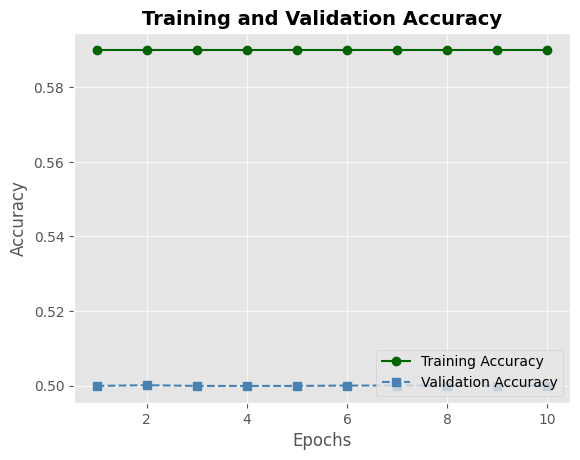

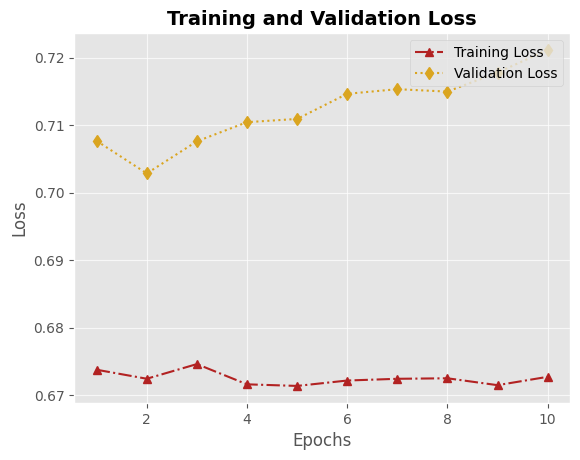

In [76]:
import matplotlib.pyplot as pl

accuracyValue = _hist.history['acc']
valid_accuracyValue = _hist.history['val_acc']
train_lossValue = _hist.history['loss']
valid_lossValue = _hist.history['val_loss']

epochs = range(1, len(accuracyValue) + 1)

pl.plot(epochs, accuracyValue, color="darkgreen", linestyle="-", marker="o", label="Training Accuracy")
pl.plot(epochs, valid_accuracyValue, color="steelblue", linestyle="--", marker="s", label="Validation Accuracy")
pl.title("Training and Validation Accuracy", fontsize=14, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Accuracy")
pl.legend(loc="lower right")
pl.grid(alpha=0.7)

pl.figure()


pl.plot(epochs, train_lossValue, color="firebrick", linestyle="-.", marker="^", label="Training Loss")
pl.plot(epochs, valid_lossValue, color="goldenrod", linestyle=":", marker="d", label="Validation Loss")
pl.title("Training and Validation Loss", fontsize=14, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Loss")
pl.legend(loc="upper right")
pl.grid(alpha=0.7)

pl.show()

pretrained word embedding layer with training sample size = 5000

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

mdl11 = Sequential()
mdl11.add(Embedding(SizeV_ocab, embdDim, input_length=_leng))
mdl11.add(Flatten())
mdl11.add(Dense(32, activation='relu'))
mdl11.add(Dense(1, activation='sigmoid'))

mdl11.build(input_shape=(None, _leng))

# Load pretrained weights
mdl11.layers[0].set_weights([emb_mat])
mdl11.layers[0].trainable = False


mdl11.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
_hist11 = mdl11.fit(
    TrainingX, TrainingY,
    epochs=10,
    batch_size=32,
    validation_data=(X_Valid_ation, Y_Valid_ation)
)

# Save the model weights
mdl11.save_weights('pre_trained_glove_model.weights.h5')


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 279ms/step - acc: 0.4175 - loss: 3.1180 - val_acc: 0.5368 - val_loss: 0.6941
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step - acc: 0.8937 - loss: 0.3812 - val_acc: 0.5304 - val_loss: 0.7019
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 0.9845 - loss: 0.2223 - val_acc: 0.5002 - val_loss: 2.2073
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step - acc: 0.5595 - loss: 1.0180 - val_acc: 0.5003 - val_loss: 1.2357
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - acc: 0.9845 - loss: 0.1504 - val_acc: 0.5125 - val_loss: 0.8945
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - acc: 1.0000 - loss: 0.0646 - val_acc: 0.5026 - val_loss: 1.0193
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 221ms/step - acc: 1.0000 - loss: 0.0517 - val_acc: 0.5555 - val_loss: 0.7347
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 435ms/step - acc: 1.0000 - loss: 0.0387 - val_acc: 0.5041 - val_loss: 1.0658
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 443ms/step - acc: 1.0000 - loss: 

In [78]:
tst_lss11, tst_a_c_c11 = mdl11.evaluate(XTesting, YTesting)
print('Test loss:', tst_lss11)
print('Test accuracy:', tst_a_c_c11)



782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - acc: 0.4928 - loss: 1.0969
Test loss: 1.0798628330230713
Test accuracy: 0.5009599924087524


pretrained word embedding layer with training sample size = 1000

Found 88582 unique tokens.
Shape of data tensor: (25000, 150)
Shape of label tensor: (25000,)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_26 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_19 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - acc: 0.5253 - loss: 2.0360 - val_acc: 0.4955 - val_loss: 2.0731
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - acc: 0.6140 - loss: 0.7272 - val_acc: 0.4920 - val_loss: 1.0154
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - acc: 0.7016 - loss: 0.5916 - val_acc: 0.5054 - val_loss: 0.9662
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - acc: 0.7743 - loss: 0.4390 - val_acc: 0.4942 - val_loss: 1.4355
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - acc: 0.8700 - loss: 0.3115 - val_acc: 0.5044 - val_loss: 1.3494
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - acc: 0.9107 - loss: 0.2226 - val_acc: 0.5097 - val_loss: 1.0459
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - acc: 0.9003 - loss: 0.2228 - val_acc: 0.5090 - val_loss: 1.0205
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - acc: 0.9478 - loss: 0.1540 - val_acc: 0.5087 - val_loss: 0.9854
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9790

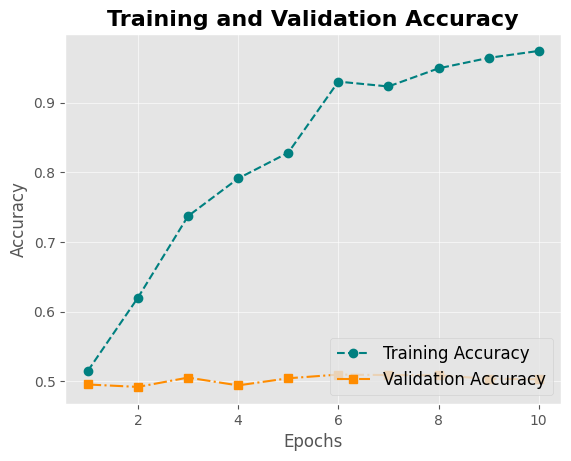

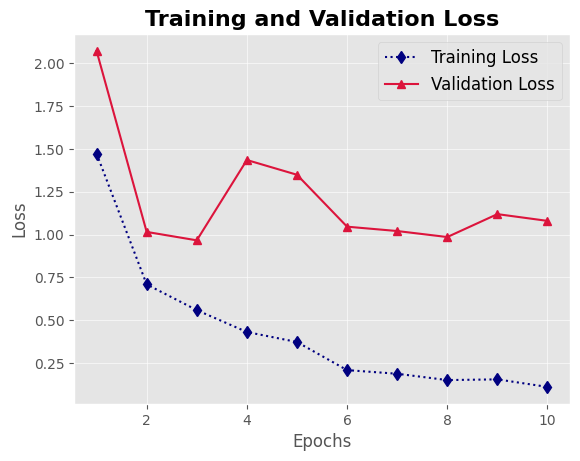

In [79]:
import numpy as np

_leng = 150  # Cut off review after 150 words
dataTrain = 1000  # Trains on 1000 samples
dataVaild = 10000  # Validation sample 10000
wrds = 10000  # Considers only the top 10000 words in the dataset

tokenizer3 = Tokenizer(num_words=wrds)
tokenizer3.fit_on_texts(t_ext_)
sequences = tokenizer3.texts_to_sequences(t_ext_)
wrd_idx = tokenizer3.word_index
print("Found %s unique tokens." % len(wrd_idx))

_da_ta = pad_sequences(sequences, maxlen=_leng)

lbl_s = np.asarray(lbl_s)
print("Shape of data tensor:", _da_ta.shape)
print("Shape of label tensor:", lbl_s.shape)

indices = np.arange(_da_ta.shape[0])
np.random.shuffle(indices)
_da_ta = _da_ta[indices]
lbl_s = lbl_s[indices]

TrainingX = _da_ta[:dataTrain]
TrainingY = lbl_s[:dataTrain]
X_Valid_ation = _da_ta[dataTrain:dataTrain+dataVaild]
Y_Valid_ation = lbl_s[dataTrain:dataTrain+dataVaild]

emb_d = 100

emb_mat = np.zeros((wrds, emb_d))
for word, i in wrd_idx.items():
    embdVector = embdIdx.get(word)
    if i < wrds:
        if embdVector is not None:
            emb_mat[i] = embdVector


mdl12 = Sequential()
mdl12.add(Embedding(wrds, emb_d, input_length=_leng))
mdl12.add(Flatten())
mdl12.add(Dense(32, activation='relu'))
mdl12.add(Dense(1, activation='sigmoid'))
mdl12.summary()


mdl12.layers[0].build(input_shape=(None, _leng))

# Set the pre-trained embedding matrix as weights
mdl12.layers[0].set_weights([emb_mat])
mdl12.layers[0].trainable = False

# Compile the model
mdl12.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


hist_12 = mdl12.fit(
    TrainingX, TrainingY,
    epochs=10,
    batch_size=32,
    validation_data=(X_Valid_ation, Y_Valid_ation)
)
mdl12.save_weights('pre_trained_glove_model.weights.h5')


a_c_c = hist_12.history['acc']
val_a_c_c = hist_12.history['val_acc']
lssTr_ain12 = hist_12.history['loss']
lssVal12 = hist_12.history['val_loss']

_epochs = range(1, len(a_c_c) + 1)

pl.plot(_epochs, a_c_c, color="teal", linestyle="--", marker="o", label="Training Accuracy")
pl.plot(_epochs, val_a_c_c, color="darkorange", linestyle="-.", marker="s", label="Validation Accuracy")
pl.title("Training and Validation Accuracy", fontsize=16, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Accuracy")
pl.legend(loc="lower right", fontsize=12)
pl.grid(alpha=0.6)

pl.figure()


pl.plot(_epochs, lssTr_ain12, color="navy", linestyle=":", marker="d", label="Training Loss")
pl.plot(_epochs, lssVal12, color="crimson", linestyle="-", marker="^", label="Validation Loss")
pl.title("Training and Validation Loss", fontsize=16, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Loss")
pl.legend(loc="upper right", fontsize=12)
pl.grid(alpha=0.6)

pl.show()


In [80]:

tst_lss12, tst_a_c_c12 = mdl12.evaluate(XTesting, YTesting)

print('Test loss:', tst_lss12)
print('Test accuracy:', tst_a_c_c12)



782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4950 - loss: 1.0939
Test loss: 1.0987735986709595
Test accuracy: 0.4942399859428406


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_27 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_20 (Flatten)                 │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - acc: 0.4838 - loss: 1.4032 - val_acc: 0.4923 - val_loss: 0.6933
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - acc: 0.5365 - loss: 0.8295 - val_acc: 0.4939 - val_loss: 0.7093
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - acc: 0.5844 - loss: 0.6613 - val_acc: 0.5060 - val_loss: 0.7246
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - acc: 0.6615 - loss: 0.6468 - val_acc: 0.5048 - val_loss: 0.7486
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - acc: 0.7341 - loss: 0.5380 - val_acc: 0.5012 - val_loss: 0.7488
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - acc: 0.8366 - loss: 0.4083 - val_acc: 0.5004 - val_loss: 0.9107
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - acc: 0.8583 - loss: 0.3908 - val_acc: 0.4956 - val_loss: 2.0459
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.8912 - loss: 0.3234 - val_acc: 0.5040 - val_loss: 0.7945
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - acc: 0.9778

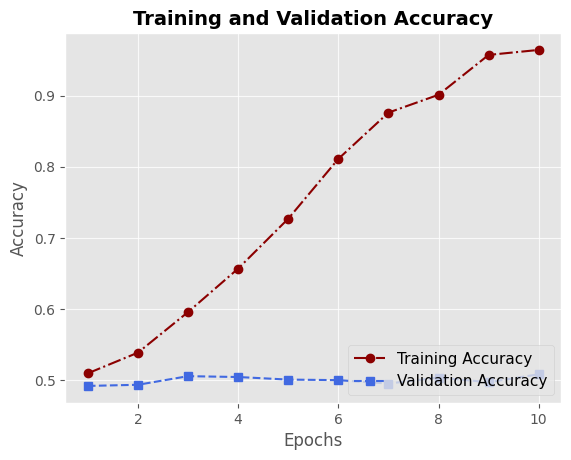

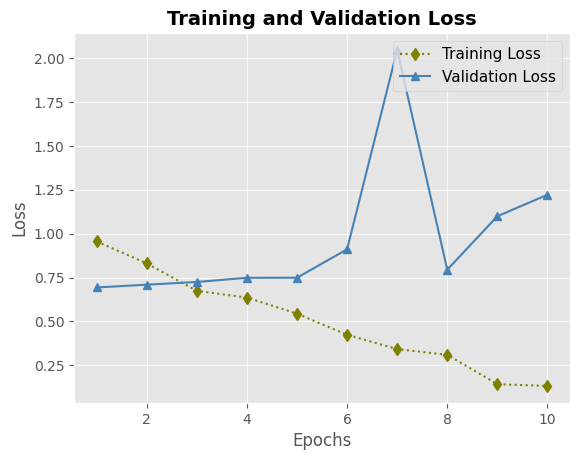

In [81]:
mdl13 = Sequential()
mdl13.add(Embedding(wrds, emb_d, input_length=_leng))
mdl13.add(Flatten())
mdl13.add(Dense(32, activation='relu'))
mdl13.add(Dense(1, activation='sigmoid'))
mdl13.summary()


mdl13.layers[0].build(input_shape=(None, _leng))
mdl13.layers[0].set_weights([emb_mat])
mdl13.layers[0].trainable = False


mdl13.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


hist_13 = mdl13.fit(
    TrainingX, TrainingY,
    epochs=10,
    batch_size=32,
    validation_data=(X_Valid_ation, Y_Valid_ation)
)


mdl13.save_weights('pre_trained_glove_model.weights.h5')


import matplotlib.pyplot as pl

a_c_c13 = hist_13.history['acc']
val_a_c_c13 = hist_13.history['val_acc']
lssTr_ain13 = hist_13.history['loss']
lssVal13 = hist_13.history['val_loss']

_epochs = range(1, len(a_c_c13) + 1)

pl.plot(_epochs, a_c_c13, color="darkred", linestyle="-.", marker="o", label="Training Accuracy")
pl.plot(_epochs, val_a_c_c13, color="royalblue", linestyle="--", marker="s", label="Validation Accuracy")
pl.title("Training and Validation Accuracy", fontsize=14, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Accuracy")
pl.legend(loc="lower right", fontsize=11)
pl.grid(alpha=0.8)

pl.figure()


pl.plot(_epochs, lssTr_ain13, color="olive", linestyle=":", marker="d", label="Training Loss")
pl.plot(_epochs, lssVal13, color="steelblue", linestyle="-", marker="^", label="Validation Loss")
pl.title("Training and Validation Loss", fontsize=14, fontweight="bold")
pl.xlabel("Epochs")
pl.ylabel("Loss")
pl.legend(loc="upper right", fontsize=11)
pl.grid(alpha=0.8)

pl.show()

In [82]:
tst_lss13, tst_a_c_c13 = mdl13.evaluate(XTesting, YTesting)
print('Test loss:', tst_lss13)
print('Test accuracy:', tst_a_c_c13)


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.4949 - loss: 1.3051
Test loss: 1.2886829376220703
Test accuracy: 0.49911999702453613
